In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Libraries for plotting data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv("train.csv")

In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Shows all the columns present in the dataframe
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
# Shows the details of all the columns in the dataframe; number of rows and type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# various metrics of each column in the dataframe
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# to check for null values present, if any
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
ageVsGender = train.groupby(['Age', 'Gender'])['Purchase'].sum()

In [11]:
ageVsGender

Age    Gender
0-17   F           42385978
       M           92527205
18-25  F          205475842
       M          708372833
26-35  F          442976233
       M         1588794345
36-45  F          243438963
       M          783130921
46-50  F          116706864
       M          304136539
51-55  F           89465997
       M          277633647
55+    F           45782765
       M          154984610
Name: Purchase, dtype: int64

# Data Preprocessing

In [12]:
train['Product_Category_2'].fillna(0, inplace=True)
train['Product_Category_3'].fillna(0, inplace=True)


In [13]:
train['Product_Category_2'] = train['Product_Category_2'].astype(int)
train['Product_Category_3'] = train['Product_Category_3'].astype(int)

In [14]:
# In Gender, replacing 'F' with 0 and 'M' with 1
train.loc[train['Gender'] == 'F', 'Gender'] = 0
train.loc[train['Gender'] == 'M', 'Gender'] = 1


In [15]:
train.loc[train['Age'] == '0-17', 'Age'] = 0
train.loc[train['Age'] == '18-25', 'Age'] = 1
train.loc[train['Age'] == '26-35', 'Age'] = 2
train.loc[train['Age'] == '36-45', 'Age'] = 3
train.loc[train['Age'] == '46-50', 'Age'] = 4
train.loc[train['Age'] == '51-55', 'Age'] = 5
train.loc[train['Age'] == '55+', 'Age'] = 6


In [16]:
train.loc[train['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

In [17]:
train.loc[train['City_Category'] == 'A', 'City_Category'] = 0
train.loc[train['City_Category'] == 'B', 'City_Category'] = 1
train.loc[train['City_Category'] == 'C', 'City_Category'] = 2


In [18]:
# Converting all object type columns to integer to maintain consistency across the dataframe
train['Gender'] = train['Gender'].astype(int)
train['Age'] = train['Age'].astype(int)
train['City_Category'] = train['City_Category'].astype(int)
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)

In [19]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [20]:
# Now, we can see that there are no null values
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [21]:
# Introducing a new feature 'Category_Count', which identifies the number of unique categories from each row in the dataframe,
# which indicates the number of unique categories a customer has shopped from
conditions = [
    (train['Product_Category_1'] != 0) & (train['Product_Category_2'] == 0) & (train['Product_Category_3'] == 0),
    (train['Product_Category_1'] != 0) & (train['Product_Category_2'] != 0) & (train['Product_Category_3'] == 0),
    (train['Product_Category_1'] != 0) & (train['Product_Category_2'] != 0) & (train['Product_Category_3'] != 0)]
choices = [1, 2, 3]
train['Category_Count'] = np.select(conditions, choices, default=0)

In [22]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1


In [21]:
train['Product_Score'] = 0.0
required_product_data = train[['Product_ID', 'Product_Score']]

# marking the default frequency as 1 so that increments at each iteration
required_product_data['Frequency'] = 1

# group the data using Product_ID, which returns sum of frequencies (total) for each Product_ID
grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [22]:
# maximum frequency of a product in the dataframe
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

# divide each product's frequency with maximum frequency
# apply to each row in the dataframe
for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [23]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [24]:
# updates Product_Score for each row in the original dataframe
for index, row in train.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    train.set_value(index, 'Product_Score', p_score)

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [25]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979


In [23]:
train['User_Score'] = 0.0
required_user_data = train[['User_ID', 'User_Score']]

# default frequency of users is set to 1, which increments at each iteration
required_user_data['Frequency'] = 1

# group user data by User_ID
grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [24]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

# divide each user's frequency with maximum frequency
# apply to each row in the dataframe
for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [25]:
final_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.034113,35
1,1000002,0.075049,77
2,1000003,0.028265,29
3,1000004,0.013645,14
4,1000005,0.103314,106


In [28]:
# apply User_Score to each row in the original dataframe
for index, row in train.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    train.set_value(index, 'User_Score', p_score)

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [29]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745,0.034113
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043,0.034113
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255,0.034113
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383,0.034113
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979,0.075049


In [31]:
cols = list(train)

# move the column to head of list using index, pop and insert
cols.insert(14, cols.pop(cols.index('Purchase')))

# shows all the columns after 3 new features have been added
cols

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score',
 'Purchase']

In [32]:
# use loc to reorder
train = train.loc[:, cols]
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049,7969


In [33]:
train.to_csv('trainnew.csv')

In [35]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
User_ID,1,-0.0334745,0.0326984,-0.0239707,0.0228593,-0.0307368,0.0204426,0.00382461,0.00389581,0.00360526,0.00426969,0.00368802,-0.0324576,0.00471566
Gender,-0.0334745,1,-0.004262,0.117291,-0.00451474,0.0146604,-0.0116032,-0.0455942,-0.000953781,0.0361463,0.0268081,0.0204561,0.0735169,0.0603457
Age,0.0326984,-0.004262,1,0.0914632,0.123079,-0.00471206,0.311738,0.0611971,0.01877,-0.00742166,-0.0212455,-0.0207412,-0.0604457,0.0158386
Occupation,-0.0239707,0.117291,0.0914632,1,0.0344787,0.0300046,0.02428,-0.00761756,0.00671225,0.0122689,0.0116002,0.0116793,-0.00292854,0.0208326
City_Category,0.0228593,-0.00451474,0.123079,0.0344787,1,0.0199458,0.0397905,-0.0143641,0.0160029,0.0355248,0.0407386,0.109546,-0.522198,0.0619142
Stay_In_Current_City_Years,-0.0307368,0.0146604,-0.00471206,0.0300046,0.0199458,1,-0.0128188,-0.0042131,0.0012616,0.00197731,0.00273476,0.00147026,-0.000279921,0.0054223
Marital_Status,0.0204426,-0.0116032,0.311738,0.02428,0.0397905,-0.0128188,1,0.0198879,0.00109912,-0.00462933,-0.0112572,-0.0104149,0.000678306,-0.000463376
Product_Category_1,0.00382461,-0.0455942,0.0611971,-0.00761756,-0.0143641,-0.0042131,0.0198879,1,-0.0678774,-0.385534,-0.51827,-0.205178,0.0177479,-0.343703
Product_Category_2,0.00389581,-0.000953781,0.01877,0.00671225,0.0160029,0.0012616,0.00109912,-0.0678774,1,0.0947495,0.444873,0.0980623,-0.0274823,0.0522877
Product_Category_3,0.00360526,0.0361463,-0.00742166,0.0122689,0.0355248,0.00197731,-0.00462933,-0.385534,0.0947495,1,0.791044,0.262332,-0.0502029,0.288501


# Data Modeling

In [167]:
data=pd.read_csv("trainnew.csv")

In [168]:
X = data.drop(['Purchase','Product_ID'], axis=1)
y = data['Purchase']

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [170]:
# data split for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [171]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 14)
(110014, 14)
(440054,)
(110014,)


In [172]:
#Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

#Instanciate of instance of the LinearRegression model
#Regression model for 1st model with 2 independent varriable
lm= LinearRegression()

In [173]:
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
# The coefficients of the model
print('Coefficients: \n ', lm.coef_)

#The intercept of the model
print('Intercept: \n ', lm.intercept_)

Coefficients: 
  [-3.55224340e-04  1.63218445e-02  4.90306684e+02  1.29582991e+02
  4.66486452e+00  7.28318324e+01  1.39282677e+01 -4.21173212e+01
 -2.84294853e+02 -2.97847071e+01  5.32538138e+01  6.60740918e+02
  5.44770106e+03 -8.44939939e+02]
Intercept: 
  -8727.083343076643


In [175]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

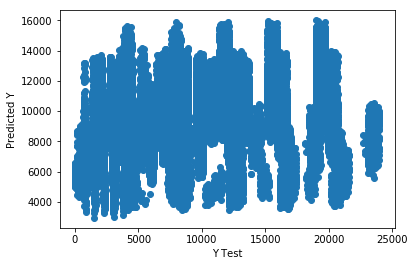

In [176]:
# check the prediction of the model with scatter plot
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [177]:
# calculate these metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3443.425290977242
MSE: 20208781.202279802
RMSE: 4495.417800636533


In [178]:
r_squared = metrics.r2_score(y_test,predictions)
print("Over all Accuracy of the model :",r_squared)

Over all Accuracy of the model : 0.19931605966790777


In [179]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [180]:
# training the model with hyparameters alpha=0.3 and normalize=True
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [181]:
# outputs an array of purchase amounts
mod2 = lassoReg.predict(X_test)

In [182]:
# calculate these metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, mod2))
print('MSE:', metrics.mean_squared_error(y_test, mod2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mod2)))

MAE: 3492.8038167759064
MSE: 20414226.093174156
RMSE: 4518.210496775704


In [183]:
r_squared = metrics.r2_score(y_test,mod2)
print("Over all Accuracy of the model :",r_squared)

Over all Accuracy of the model : 0.19117621080142455


In [184]:
# training the model with hyperparameters alpha=0.05 and normalize=True
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [185]:
mod3=ridgeReg.predict(X_test)

In [186]:
# calculate these metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, mod3))
print('MSE:', metrics.mean_squared_error(y_test, mod3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mod3)))

MAE: 3450.3051583896345
MSE: 20214040.563698888
RMSE: 4496.002731727249


In [187]:
r_squared = metrics.r2_score(y_test,mod3)
print("Over all Accuracy of the model :",r_squared)

Over all Accuracy of the model : 0.1991076806378954


In [188]:
# training the model with hyperparameters alpha=1, l1_ratio=0.5 and normalize=True
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [189]:
mod4=ENreg.predict(X_test)

In [190]:
print('MAE:', metrics.mean_absolute_error(y_test, mod4))
print('MSE:', metrics.mean_squared_error(y_test, mod4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mod4)))

MAE: 3514.082035268815
MSE: 21228050.332291476
RMSE: 4607.390837805219


In [191]:
r_squared = metrics.r2_score(y_test,mod4)
print("Over all Accuracy of the model :",r_squared)

Over all Accuracy of the model : 0.15893201002593627


In [192]:
from sklearn.ensemble import ExtraTreesRegressor

In [193]:
# training the ExtraTrees regressor with n_estimators being 10
eTreeReg = ExtraTreesRegressor(n_estimators=10)
eTreeReg.fit(X_train,y_train)

# predicts the purchase amounts and outputs an array 
mod5 = eTreeReg.predict(X_test)

In [194]:
mod5=eTreeReg.predict(X_test)

In [195]:
print('MAE:', metrics.mean_absolute_error(y_test, mod5))
print('MSE:', metrics.mean_squared_error(y_test, mod5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mod5)))

MAE: 2104.8816277928263
MSE: 8272900.684314359
RMSE: 2876.2650580769428


In [196]:
r_squared = metrics.r2_score(y_test,mod5)
print("Over all Accuracy of the model :",r_squared)

Over all Accuracy of the model : 0.6722227505167102


In [197]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# train the model with n_estimators=20
rf = RandomForestRegressor()

In [198]:
rf.fit(X_train,y_train)

C:\Users\Sowmya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [199]:
mod6=rf.predict(X_test)

In [200]:
print('MAE:', metrics.mean_absolute_error(y_test, mod6))
print('MSE:', metrics.mean_squared_error(y_test, mod6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mod6)))

MAE: 2075.0280882433144
MSE: 7942381.5866654245
RMSE: 2818.2231257772023


In [201]:
r_squared = metrics.r2_score(y_test,mod6)
print("Over all Accuracy of the model :",r_squared)

Over all Accuracy of the model : 0.6853181139041223


In [202]:
import xgboost

In [203]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [204]:
xgb.fit(X_train,y_train)

C:\Users\Sowmya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:58:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [205]:
mod7=xgb.predict(X_test)

In [206]:
print('MAE:', metrics.mean_absolute_error(y_test, mod7))
print('MSE:', metrics.mean_squared_error(y_test, mod7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mod7)))

MAE: 2000.5229349556262
MSE: 7223971.973371442
RMSE: 2687.7447745966215


In [207]:
r_squared = metrics.r2_score(y_test,mod7)
print("Over all Accuracy of the model :",r_squared)

Over all Accuracy of the model : 0.7137819304097802


Text(0, 0.5, 'Predicted Y')

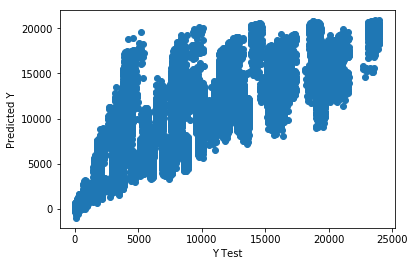

In [208]:
# check the prediction of the model with scatter plot
plt.scatter(y_test,mod7)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')